In [3]:
#DOWNLOAD THE YOLOV3-320  CONFIG AND WEIGHT FILES FROM https://pjreddie.com/darknet/yolo/

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file='./54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='./ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb'

In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classlabels=[]
file_name="labels.txt"

with open(file_name,'rt') as f:
    classlabels=f.read().rstrip('\n').split('\n')
    

In [7]:
print(len(classlabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002535E0ADB90>

READ AN IMAGE


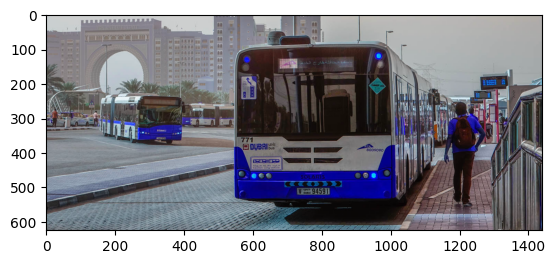

In [9]:
img=cv2.imread('./bus.jpg')
plt.imshow(img)

ACTUAL IMAGE

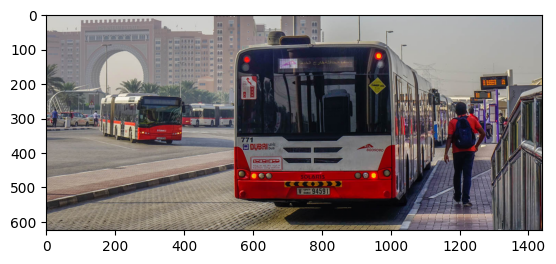

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [11]:
classindex,conf,bbox=model.detect(img,confThreshold=0.5)

In [12]:
for classind,c,b in zip(classindex.flatten(),conf.flatten(),bbox):
    cv2.rectangle(img,b,(255,0,0),2)
    cv2.putText(img,classlabels[classind-1],(b[0]+10,b[1]+40),cv2.FONT_HERSHEY_PLAIN,
                fontScale=3,color=(0,255,0),thickness=3)
    

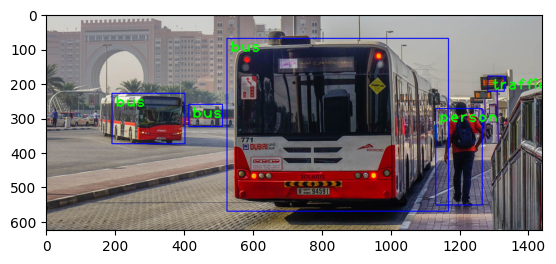

In [13]:

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

FOR VIDEO

In [14]:
cap=cv2.VideoCapture("./videoplayback.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    raise IOError("cant open")
    
while True:
    r,fr=cap.read()
    ci,confid,bbx=model.detect(fr,confThreshold=0.5)
    if(len(ci)!=0):
        for classind,c,b in zip(ci.flatten(),confid.flatten(),bbx):
            if(classind<=80):
                cv2.rectangle(fr,b,(255,0,0),2)
                cv2.putText(fr,classlabels[classind-1],(b[0]+10,b[1]+40),cv2.FONT_HERSHEY_PLAIN,
                    fontScale=3,color=(0,255,0),thickness=3)

    cv2.imshow('',fr)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()    
    
        
    

KeyboardInterrupt: 

: 